#House Prices Prediction using TensorFlow Decision Forests


Install TensorFlow Decision Forests for seamless integration of decision forest models with TensorFlow


In [1]:
pip install tensorflow_decision_forests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 13.1 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

loading a CSV file named "train.csv" into a pandas DataFrame called `dataset_df`, and then printing out the shape of the dataset and some additional information about its structure using the `info()` method.


In [3]:
train_file_path = "train.csv"
dataset_df = pd.read_csv(train_file_path)
print("The shape of the dataset {}".format(dataset_df.shape))
dataset_df.info()

Full train dataset shape is (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual  

display the first few rows of the DataFrame `dataset_df`.

In [4]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


This section of code to analyze the distribution of the 'SalePrice' column in the DataFrame `dataset_df`.

- `print(dataset_df['SalePrice'].describe())` prints out descriptive statistics for the 'SalePrice' column, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values.

- `plt.figure(figsize=(5, 4))` creates a figure with a specific size for plotting.

- `sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})` uses Seaborn to plot a histogram of the 'SalePrice' column. It specifies the color as green ('g'), divides the data into 100 bins, and sets the transparency of the histogram bars to 0.4.

This code provides a visual representation of the distribution of sale prices in the dataset.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-5-f74e10921602>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


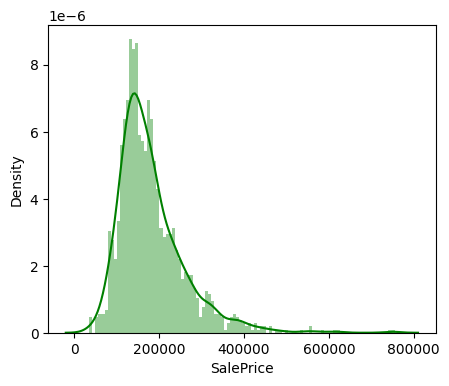

In [5]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(5, 4))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

droping the 'Id' column from the DataFrame `dataset_df` and displays the first three rows of the modified DataFrame.

In [6]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


create a new DataFrame called `df_num` by selecting only the columns with numerical data types (`float64` and `int64`) from the DataFrame `dataset_df` , for focusing analysis on numerical features.

In [7]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


generates histograms for all numerical columns in the DataFrame `df_num`, It's a convenient way to visualize the distributions of numerical features in the dataset.

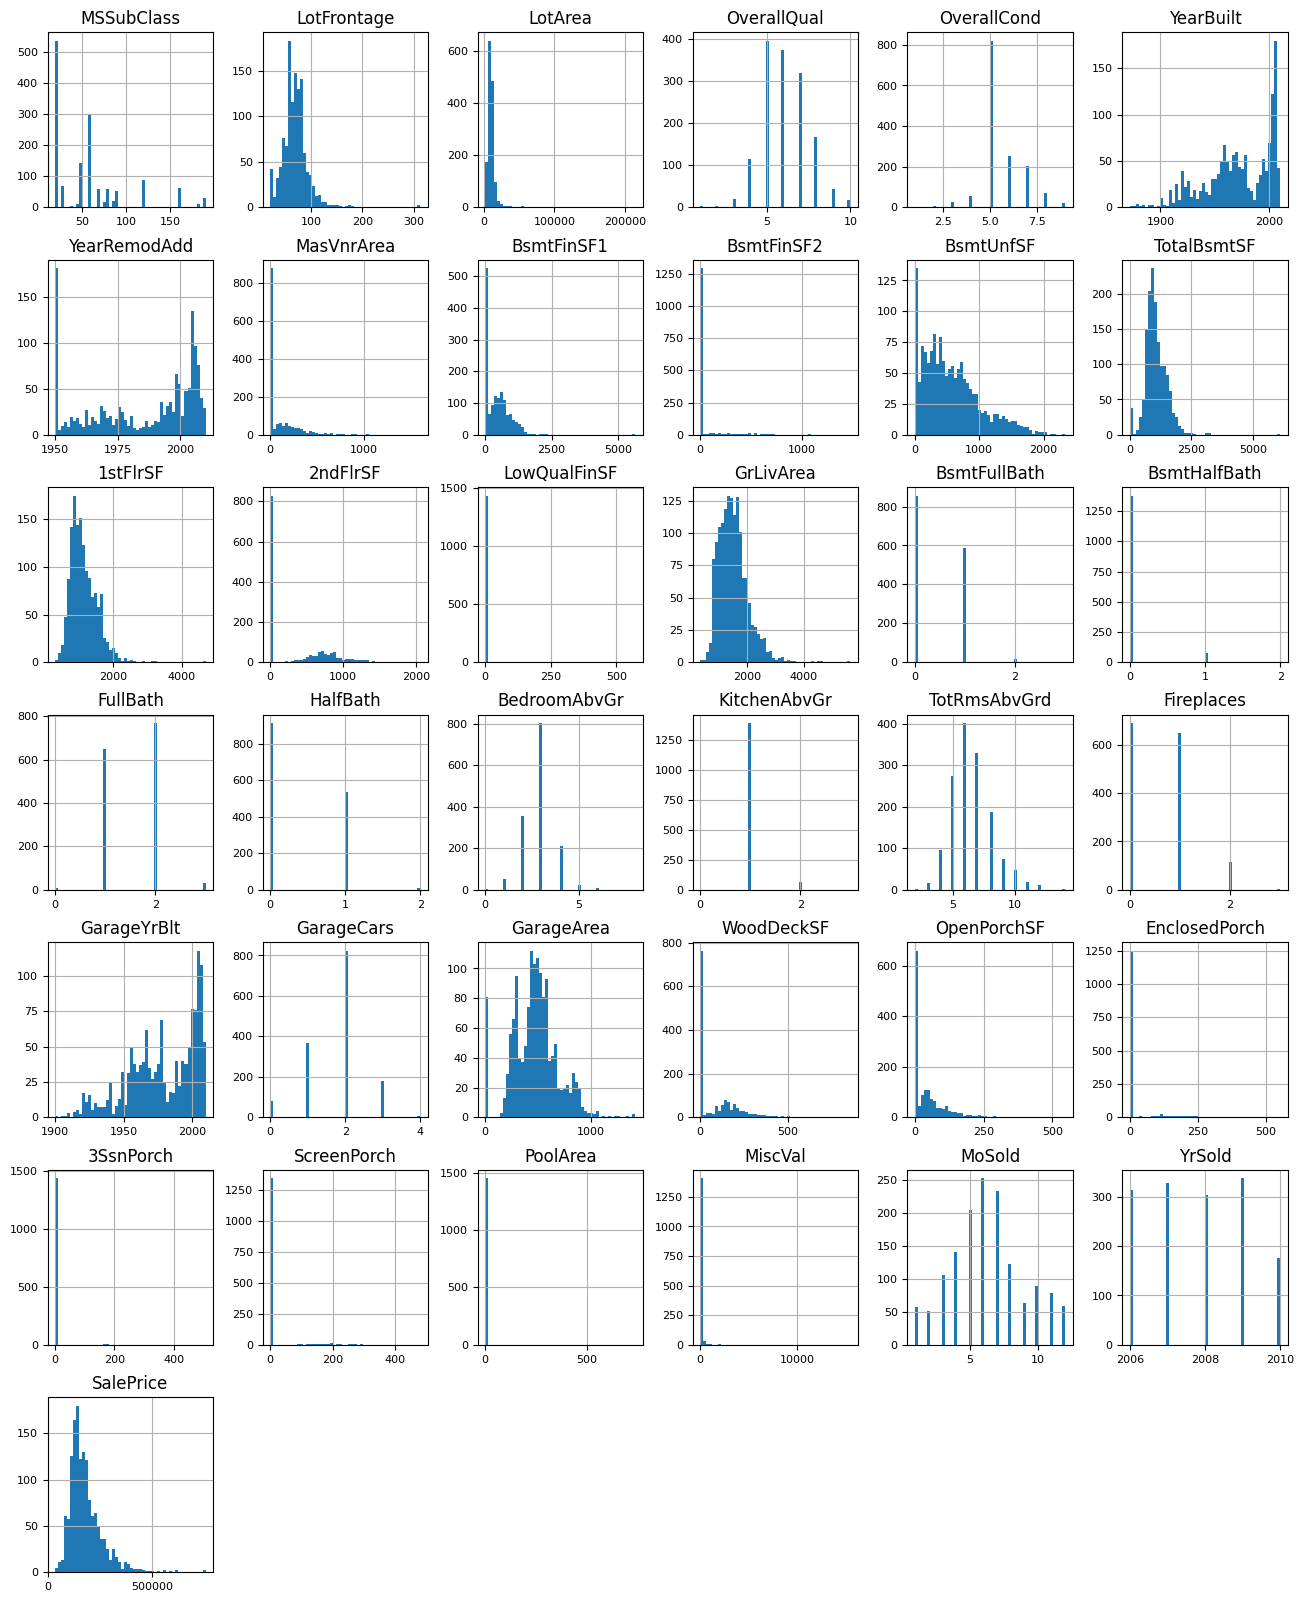

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

This code defines a function `split_dataset` that splits a dataset into training and testing sets based on a specified test ratio. It then applies this function to split the DataFrame `dataset_df` into training and validation DataFrames, `train_ds_pd` and `valid_ds_pd`,and it prints out the number of examples in each set. i did that to create a training and validation sets .

In [9]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1036 examples in training, 424 examples in testing.


convert the pandas DataFrames `train_ds_pd` and `valid_ds_pd` into TensorFlow datasets suitable for regression tasks using TensorFlow Decision Forests (TF-DF). The 'SalePrice' column is specified as the label, and the task is set to regression. This prepares the data for training and validation of a regression model using TF-DF.

In [10]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

initialize a Random Forest model for regression tasks using TensorFlow Decision Forests (TF-DF).

In [11]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

Use /tmp/tmptkgnbcrb as temporary training directory


train the Random Forest model `rf` using the training dataset `train_ds`.

In [12]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:07.926340. Found 1036 examples.
Training model...
Model trained in 0:00:04.291142
Compiling model...
Model compiled.


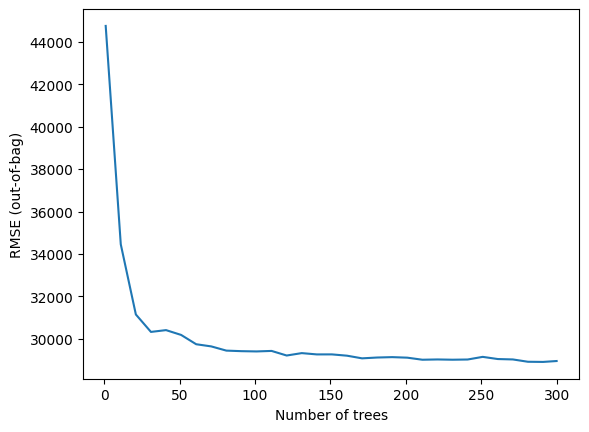

In [13]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

evaluate the trained Random Forest model `rf` using the validation dataset `valid_ds`. It calculates metrics such as loss and accuracy and prints them out for analysis.

In [14]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 530ms/step - loss: 0.0000e+00
loss: 0.0000


read a test dataset from a CSV file ("test.csv"), extracts the 'Id' column, and converts the remaining data into a TensorFlow dataset suitable for regression tasks (`test_ds`). It then uses the trained Random Forest model (`rf`) to make predictions on the test dataset.

The predictions are stored in a DataFrame (`output`), which includes the 'Id' column and the corresponding predicted 'SalePrice'. The `head()` method is used to display the first few rows of the output DataFrame. This process is common in machine learning workflows to generate predictions for new or unseen data.

In [15]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()


2/2 [==============================] - 1s 24ms/step


,Id,SalePrice
0,1461,126156.343750
1,1462,154321.109375
2,1463,181585.062500
3,1464,185583.000000
4,1465,196570.296875


read a sample submission file ("sample_submission.csv"), replaces the 'SalePrice' column with predictions generated by the Random Forest model (`rf`) on the test dataset (`test_ds`), and then saves the updated DataFrame to a new CSV file named "submission.csv" without including the index. Finally, it displays the first few rows of the updated DataFrame.

In [17]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 1s 46ms/step


,Id,SalePrice
0,1461,126156.343750
1,1462,154321.109375
2,1463,181585.062500
3,1464,185583.000000
4,1465,196570.296875
